# Typical results
-----------------
The results shown here are obtained from running simulations with the parameters given in the next section.  
These are based mainly in the results shown in the [K-Athena repository](https://gitlab.com/pgrete/kathena/-/wikis/turbulence) and in [Federrath et al. (2010)](https://ui.adsabs.harvard.edu/abs/2011PhRvL.107k4504F/abstract).

### High level temporal evolution

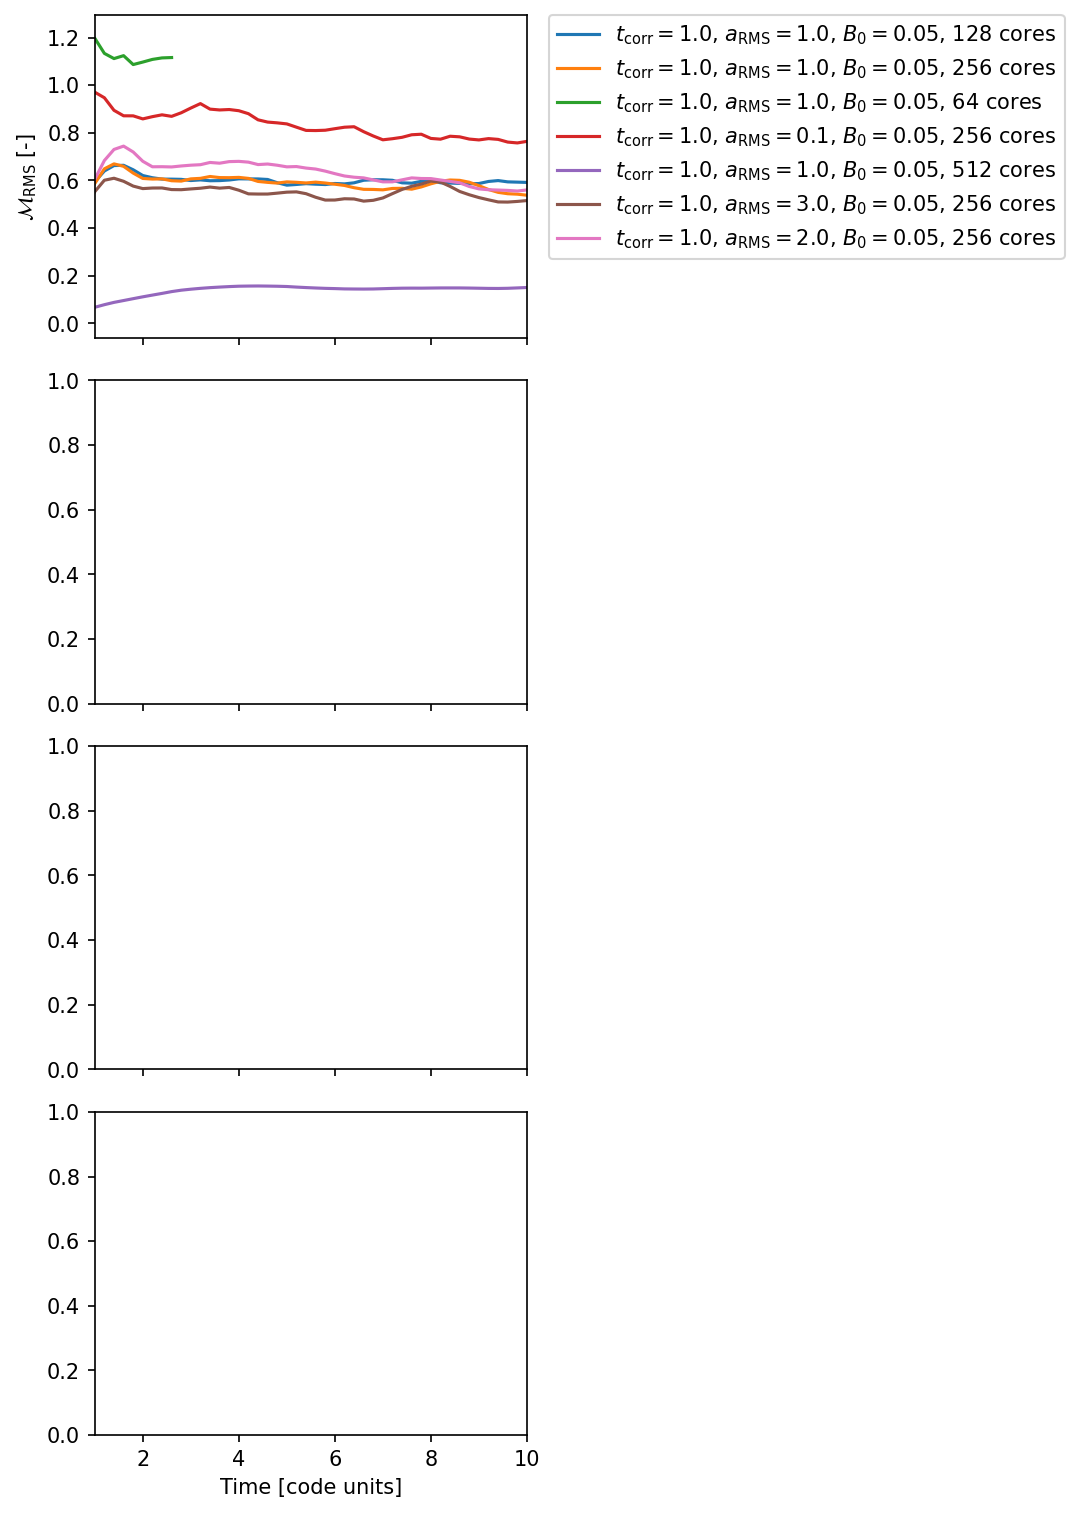

In [25]:
import os
import numpy as np
import matplotlib.pyplot as plt
from src.model import LoadAthenaPKRun

output_path = "outputs"
fields_for_analysis = ["mach_number", "density", "magnetic_energy_density", "magnetic_field_magnitude"]

# Use os.listdir to get a list of all files and folders in the directory
runs = os.listdir(output_path)
fig, ax = plt.subplots(len(fields_for_analysis), 1, dpi=150, figsize=(3.5, 10), sharex=True)

legend_handles = []
for i, run in enumerate(runs):
    try:
        sim = LoadAthenaPKRun(os.path.join(output_path, run))
        n_cell = sim.number_of_cells
        t_corr = sim.correlation_time
        accel_rms = sim.acceleration_field_rms
        B_initial = sim.initial_magnetic_field

        for j, field in enumerate(fields_for_analysis):
            try:
                run_data = np.genfromtxt(os.path.join(output_path, run, f"average_{field}_in_time.txt"))
                ax[j].plot(run_data[:, 0], run_data[:, 1])
            except FileNotFoundError:
                # print(f"WARNING: file `average_{field}_in_time.txt` not found in current `{run}` folder.")
                pass

        label = fr'$t_{{\rm corr}}={t_corr}$, $a_{{\rm RMS}}={accel_rms}$, $B_0={B_initial}$, {n_cell} cores'
        legend_handles.append(label)

    except AttributeError:
        pass

fig.tight_layout()
ax[0].set_xlim(1e0, 1e1)
ax[0].set_ylabel(r'$\mathcal{M}_{\rm RMS}$ [-]')
ax[-1].set_xlabel(r'Time [code units]')

# Todo : fix legend
ax[0].legend(legend_handles, bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)

### Convergence walltime test
Total walltime for each representative run

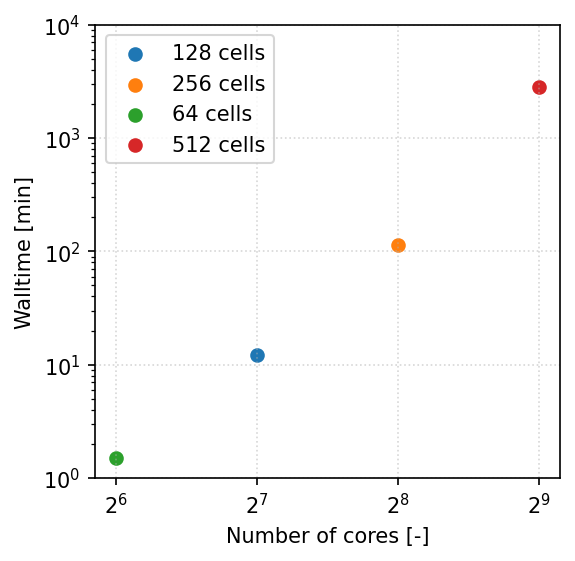

In [20]:
fig, ax = plt.subplots(1, 1, dpi=150, figsize=(4, 4))

for run in runs:
    try:
        sim = LoadAthenaPKRun(os.path.join(output_path, run))
        n_cell = sim.number_of_cells

        if (
          sim.correlation_time == 1.0
          and sim.equation_of_state == "Adiabatic"
          and sim.acceleration_field_rms == 1.0
          and sim.initial_magnetic_field == 0.05
        ):
            try:
                ax.scatter(n_cell, sim.walltime / 60, label=f"{n_cell} cells")
            except Exception as e:
                raise Warning(f'Error loading snapshot {run} data: {str(e)}')

    except AttributeError:
        pass

ax.grid(True, alpha=0.5, linestyle=":")
ax.set_xlabel(r'Number of cores [-]')
ax.set_ylabel(r'Walltime [min]')
ax.set_xscale('log', base=2)
ax.set_yscale('log')
ax.set_ylim(1e0, 1e4)
ax.legend()

### Consistency of acceleration field

['parthenon.prim.00047.phdf', 'parthenon.prim.00048.phdf', 'parthenon.prim.00049.phdf', 'parthenon.prim.final.phdf']



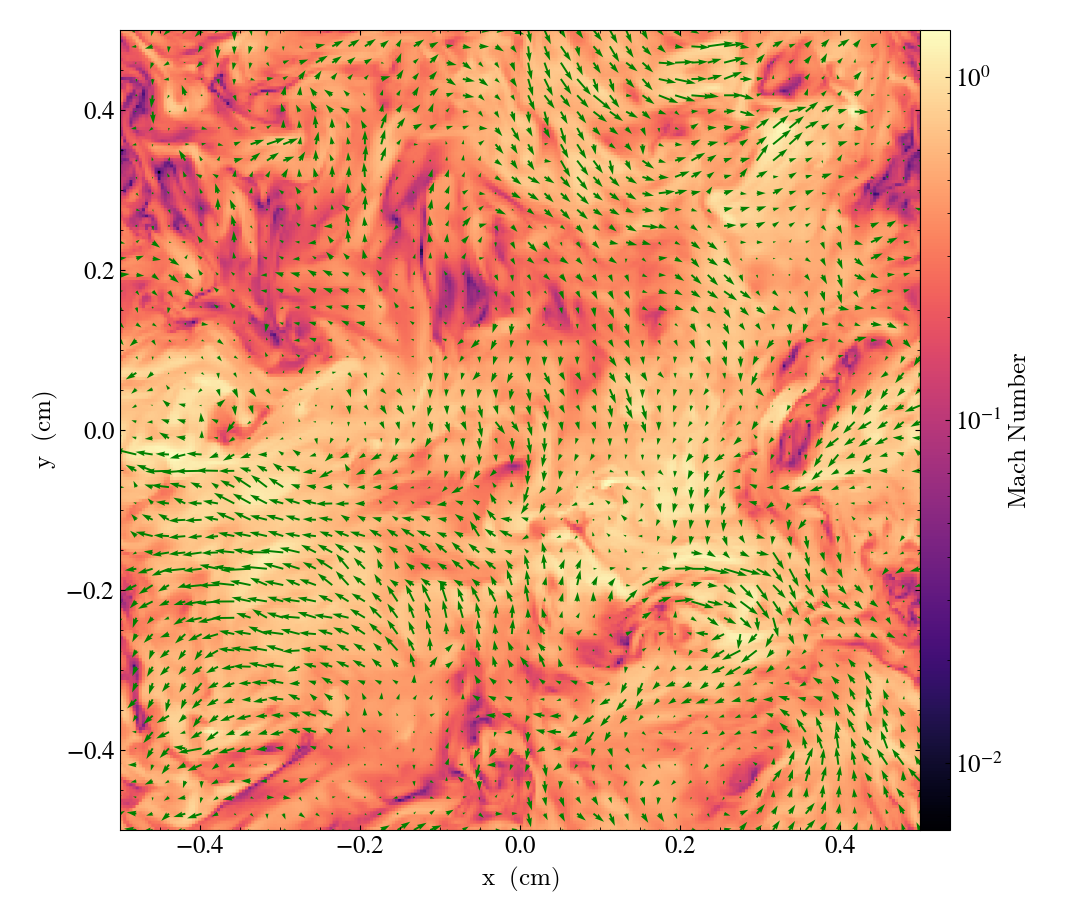

In [7]:
import os
from src.model import LoadAthenaPKRun

# Usage example
run = 'Turb_nGPUs1_ncells256_accelrms1.0_B0.05_Adiab'
sim = LoadAthenaPKRun(os.path.join('outputs', run))
print(sim.snapshot_list)

p = sim.plot_snapshot_field(
    'final',
    ('gas', 'mach_number'),
    color_map='magma',
    overplot_velocity=True
)
p.show()